In [1]:
import numpy as np

print("ok")

ok


In [27]:
y_train = [(2*x + np.random.rand()*20 - 10 + 30) for x in range(100)] #2x+30

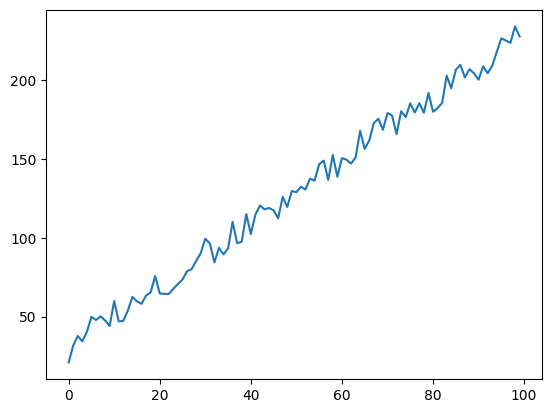

In [28]:
import matplotlib.pyplot as plt
plt.plot(y_train)
plt.show()

In [35]:
sigma = lambda x: sum([j for j in range(x)])
square_sigma = lambda x: sum([j**2 for j in range(x)])
n = 100
sum_x = sigma(n)
sum_x_square = square_sigma(n)
sum_y = sum(y_train)
sum_xy = sum([y_train[i]*i for i in range(n)])

#AX=r
A = np.array([[n, sum_x],[sum_x, sum_x_square]])
r = np.array([[sum_y,], [sum_xy]])

print(A.shape, r.shape)

(2, 2) (2, 1)


In [30]:
A_inverse = np.linalg.inv(A)
a_b = np.dot(A_inverse, r)
print(a_b)

[[29.09005033]
 [ 2.00672965]]


In [32]:
# get MSE
MSE = sum([(y_train[i] - y_test(i))**2 for i in range(100)])/100
print("MSE:", MSE)

MSE: [34.81676167]


In [33]:
y_base = lambda x: 30 + 2*x
MSE_base = sum([(y_train[i] - y_base(i))**2 for i in range(100)])/100
print("MSE:", MSE_base)

MSE: 35.187233327047764


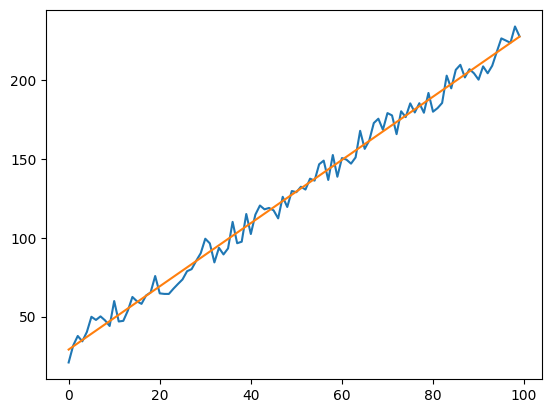

In [37]:
y_test = lambda x: a_b[0] + x*a_b[1]
plt.plot(y_train)
#plt.plot([y_base(x) for x in range(100)])
plt.plot([y_test(x) for x in range(100)])
plt.show()

$S = ∑(y_{i} - ŷ_{i})^2 = ∑(y_{i} - a - bx_i)^2$ \\
$\frac{dS}{da} = -2∑(y_{i} - a - bx_i)$ \\
$\frac{dS}{db} = -2∑x_i(y_{i} - a - bx_i)$ \\
 \\
$⇒ an + b ∑x_i = ∑y_i$ \\
$⇒ a∑x_i + b∑x_i^2 = \sum x_i y_i$
 \\
 \\
$\begin{pmatrix}
n & ∑x_i \\
∑x_i & ∑x_i^2
\end{pmatrix}$
$\begin{pmatrix}
a \\
b
\end{pmatrix}$
$=$
$\begin{pmatrix}
∑y_i \\
∑x_i y_i
\end{pmatrix}$ \\
-> 역행렬로 a, b구하면 MSE가 최소가 됨.
변수가 추가되면 그만큼 식을 추가.

In [1]:
# functionize regression analysis
%%writefile regression.py
import numpy as np

def regression_analysis(train_data):
  sigma = lambda x: sum([j for j in range(x)])
  square_sigma = lambda x: sum([j**2 for j in range(x)])
  n = len(train_data)
  sum_x = sigma(n)
  sum_x_square = square_sigma(n)
  sum_y = sum(train_data)
  sum_xy = sum([train_data[i]*i for i in range(n)])
  A = np.array([[n, sum_x],[sum_x, sum_x_square]])
  r = np.array([[sum_y,], [sum_xy]])
  A_inverse = np.linalg.inv(A)
  a_b = np.dot(A_inverse, r)
  return lambda x: a_b[0] + a_b[1]*x

if __name__ == "__main__":
  print("regression.py is running")

UsageError: Line magic function `%%writefile` not found.


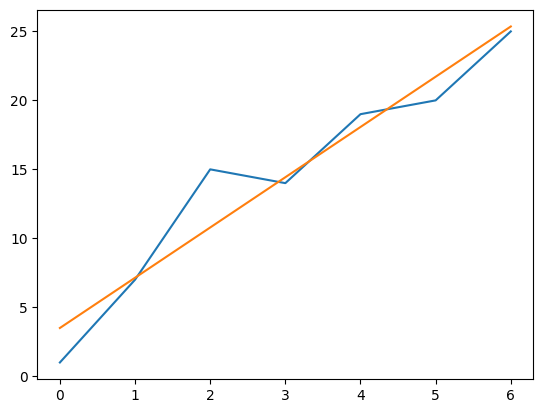

In [41]:
test_train_data = [1, 7, 15, 14, 19, 20, 25]
reg_data = regression_analysis(test_train_data)
plt.plot(test_train_data)
plt.plot([reg_data(x) for x in range(len(test_train_data))])
plt.show()